# Use pandas for import dataset

## Carga y manipulacion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [59]:
df = pd.read_csv("./datasets/1.3/info_pais.csv", encoding="ISO-8859-1" ,delimiter=";")

hola = "../Estructuras de datos/" #para retrocer una carpeta anterior usamos (..) y para mencionar la misma ubicacion (.)
df.shape
#df.head()

(168, 4)

In [66]:
df["Renta per capita"].describe() #para describir los datos
#df.dtypes # para identificar los tipos de datos

count       168.000000
mean      13473.815476
std       18106.221021
min         293.000000
25%        1996.500000
50%        5572.000000
75%       16032.750000
max      105280.000000
Name: Renta per capita, dtype: float64

In [100]:
# Ordenar los valores del mayor al menor (forma decreciente)
df_order = df.sort_values("Esperanza de vida", ascending=True)
df_order.head()

,País,Poblacion,Renta per capita,Esperanza de vida
151,Central African Republic,4596023,424,"52,8"
149,Lesotho,2091534,1233,"53,7"
128,Chad,15016753,657,54
143,Sierra Leone,7488423,504,"54,3"
28,Nigeria,190873244,1969,"54,3"


Renta per capital o ingreso per capital
* Mide la relación entre el PIB y el número de residentes en un país.
* Puede definirse como un indicador de riqueza o estabilidad económica de un país
* Se calcula dividiendo el PIB total por la cantidad de habitantes de la economía.

### ¿Hay una correlacion entre Esperanza de vida y Renta per capital?

## Visualizacion

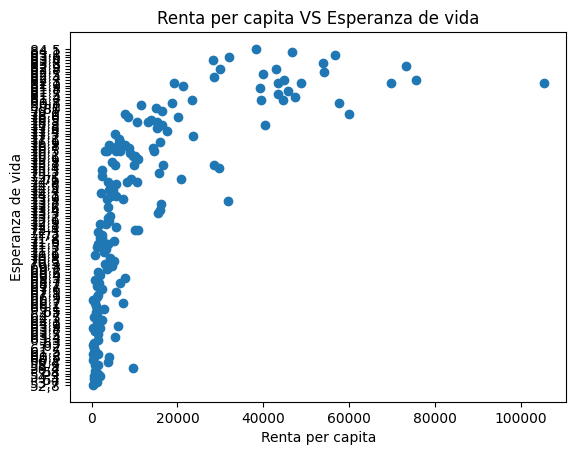

In [101]:
plt.scatter(df_order["Renta per capita"], df_order["Esperanza de vida"])
plt.title("Renta per capita VS Esperanza de vida")
plt.xlabel("Renta per capita")
plt.ylabel("Esperanza de vida")

plt.show()

In [102]:
## Normalizamos los datos para que tengan una escala y rango de 0 a 1 (excepto z-core:con valores de -3 a 3)
# Simple feature scaling - Xnew=Xold/Xmax
Pobl_normalizada = df_order["Poblacion"]/df_order["Poblacion"].max() # me da un pandas.series
# Min-Max - Xnew=(Xold-Xmin)/(Xmax-Xmin)
Pobl_normalizada1 = (df_order["Poblacion"]-df_order["Poblacion"].min())/(df_order["Poblacion"].max()-df_order["Poblacion"].min())
#Z-core - Xnew=(Xold-X.mean)/X.desviacion_estandar
Pobl_normalizada2 = (df_order["Poblacion"]-df_order["Poblacion"].mean())/df_order["Poblacion"].std()
#print(type("Pobl_normalizada")) identificar que es un pandas.series

m = pd.DataFrame(Pobl_normalizada, columns=["Poblacion"])
n = pd.DataFrame(Pobl_normalizada1, columns=["Poblacion"])
o = pd.DataFrame(Pobl_normalizada2, columns=["Poblacion"])

w = m.merge(n, how='inner', left_index=True, right_index=True)
datos = w.merge(o, how='inner', left_index=True, right_index=True)

datos

,Poblacion_x,Poblacion_y,Poblacion
151,0.003234,0.003222,-0.249652
149,0.001472,0.001459,-0.265825
128,0.010568,0.010555,-0.182360
143,0.005270,0.005257,-0.230974
28,0.134321,0.134310,0.953239
...,...,...,...
13,0.032827,0.032815,0.021896
8,0.042697,0.042685,0.112472
34,0.004017,0.004004,-0.242471
31,0.005142,0.005129,-0.232150


In [104]:
df_order["Pobl_normalizada"] = df_order["Poblacion"]/(df_order["Poblacion"].max()/10000) # el 10000 es para que no escojamos un valor tan elevado para hacer el escalado
#df_order.drop(['Pobl_normalizada1', 'Pobl_normalizada2'], axis=1) # para eliminar columnas con axis=1 y filas axis=0
df_order.head()

,País,Poblacion,Renta per capita,Esperanza de vida,Pobl_normalizada
151,Central African Republic,4596023,424,"52,8",32.343086
149,Lesotho,2091534,1233,"53,7",14.718522
128,Chad,15016753,657,54,105.675740
143,Sierra Leone,7488423,504,"54,3",52.697454
28,Nigeria,190873244,1969,"54,3",1343.211239


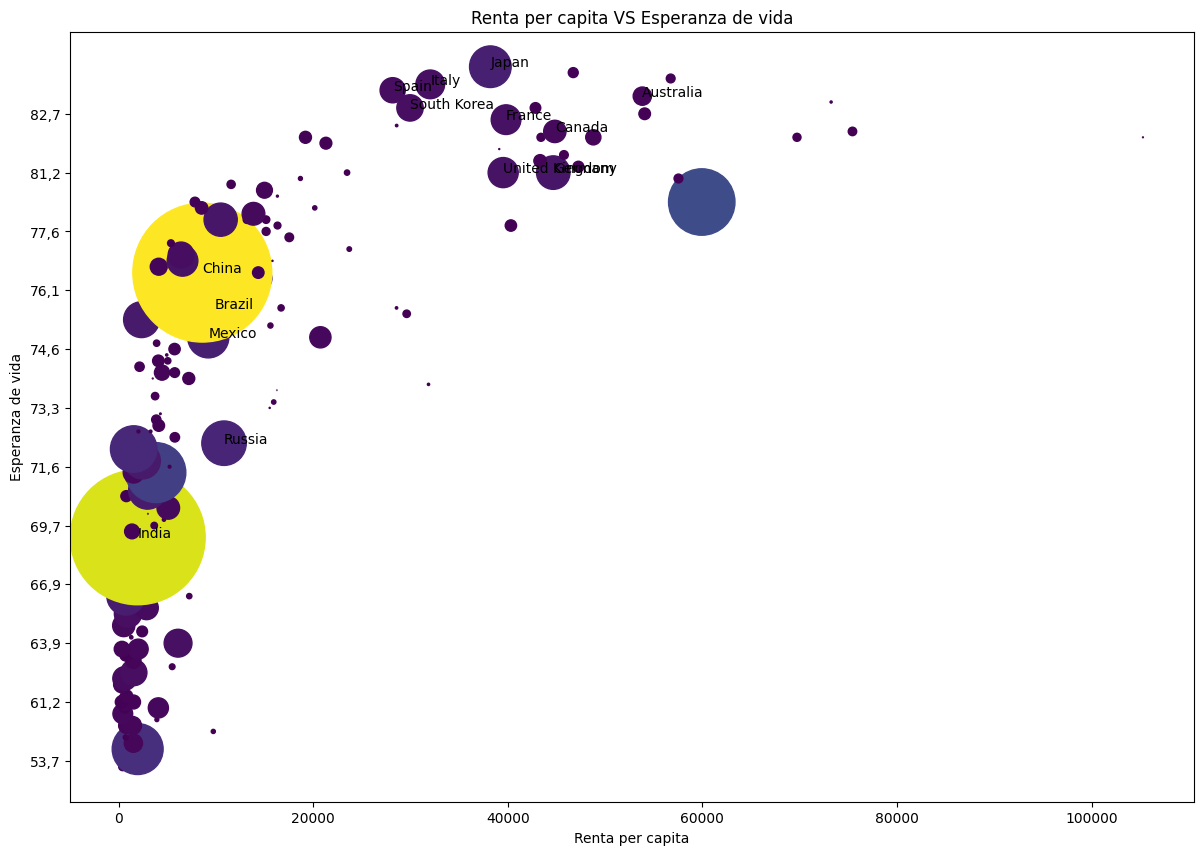

In [119]:
# s para en funciond el tamaño de acuerdo a la poblacion normalizada y c para el color de acuerdo a la poblacion normalizada
plt.scatter(df_order["Renta per capita"], df_order["Esperanza de vida"], s=df_order["Pobl_normalizada"],c=df_order["Pobl_normalizada"])
plt.title("Renta per capita VS Esperanza de vida")
plt.xlabel("Renta per capita")
plt.ylabel("Esperanza de vida")

#para modificar el tamaño de la grafica mostrada y asi poder visualizar mas datos
fig = plt.gcf()
fig.set_size_inches(14.5, 10)

# para anotar los nombres de los 15 paises con mayor poblacion
for i in range(1,15):
    plt.annotate(df_order["País"][i],(df_order["Renta per capita"][i],df_order["Esperanza de vida"][i]))

# para los valores del eje y
plt.yticks(ticks=range(1,120,10))

plt.show()